/Users/utkarshsharma


In [1]:
from ticktack import *


In [2]:
ticktack.__file__

'/home/utkarsh/anaconda3/envs/ticktack/lib/python3.8/site-packages/ticktack/ticktack.py'

In [3]:
import matplotlib.pyplot as plt
import jax.numpy as jnp

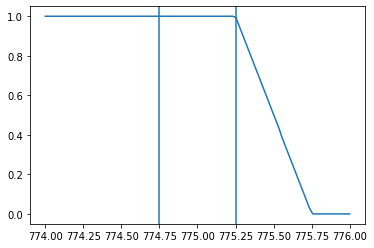

In [429]:
dates = np.linspace(774, 776,100)
t = np.linspace(773,777,4*300)
binned = []
act = []

def rebin(s, ti):
    start_month_bin_index = 3
    time_out = [774, 775, 776]
    sample_per_month = 25
    binned_data = np.array([0.0] * 3)    
    thing = []

    for i in range(len(time_out)):
        mask = (ti > (774 +i - 0.75)) * (ti < (774 + i + 1 - 0.75))
        chunk = s[(i + 1) * 300 - start_month_bin_index  * 25: (i + 2) * 300 - start_month_bin_index * 25]
        masked = np.linspace(0,1,chunk.shape[0])
        kernel = 1.0*(0.5<masked) # move this outside
        binned_data[i] = np.sum(chunk*kernel)/(np.sum(kernel))
    
    return binned_data[1], thing
            
def intervals(growth_seasons):
    a = 0
    b = 0
    interval = []
    
    for i, growth in enumerate(growth_seasons):
        
        if growth == 1:
            b = i
        elif growth == 0 and b != 0:
            interval.append((a,b))
            b = 0
            a = i
        elif growth == 0 and b == 0:
            a += 1
    if b != 0:
        interval.append((a,b))
    
    return interval
            


for date in dates:
    step = 1.0 * (t > date)
    a, thing = rebin(step, t)
    binned.append(a)

binned = np.array(binned)
plt.plot(dates, binned)
plt.axvline(774.75)
plt.axvline(775.25)
plt.show()


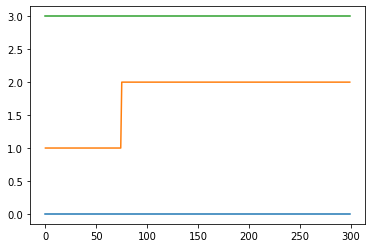

In [363]:
for j,ch in enumerate(thing): 
    plt.plot(j + ch)

In [ ]:
mask = (t>(774-0.25))*(t<(775-0.25))
masked_date = t[mask]
masked = np.mod(t[mask],1)
kernel = 1.0*(masked<0.25)+(masked>0.75)
plt.plot(masked,masked_date,'.')
print(np.sum(masked_date*kernel))
print(np.sum(masked_date*kernel/sum(kernel)))

116024.81234361968
773.4987489574645


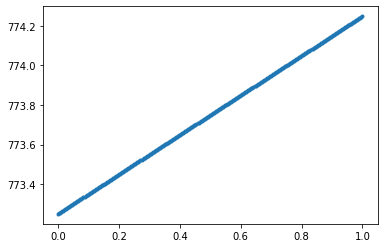

In [407]:
mask = (t>(774-0.75))*(t<(775-0.75))
masked_date = t[mask]
masked = np.linspace(0,1,masked_date.shape[0])
kernel = kernel = 1.0*(masked<0.5)# move this outside
plt.plot(masked,masked_date,'.')
print(np.sum(masked_date*kernel))

print(np.sum(masked_date*kernel)/np.sum(kernel))

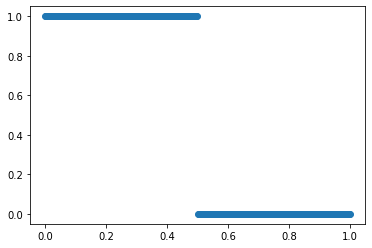

In [399]:
plt.plot(masked,kernel, 'o')

In [3]:
cbm = load_presaved_model('Guttler14', production_rate_units='atoms/cm^2/s')
cbm.compile()

INFO[2021-12-07 14:13:47,532]: Unable to initialize backend 'tpu_driver': Not found: Unable to find driver in registry given worker: 
INFO[2021-12-07 14:13:47,534]: Unable to initialize backend 'gpu': Not found: Could not find registered platform with name: "cuda". Available platform names are: Interpreter Host
INFO[2021-12-07 14:13:47,537]: Unable to initialize backend 'tpu': Invalid argument: TpuPlatform is not available.
WARNING[2021-12-07 14:13:47,539]: No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [8]:
start = 760
resolution = 996
burn_in_time = np.linspace(760 - 1000, 760, resolution)
steady_state_burn_in = cbm.equilibrate(target_C_14=707)
burn_in_solutions = cbm.equilibrate(production_rate=steady_state_burn_in)
d_14_time_series_fine = np.linspace(760, 788, 2700)
d_14_time_series_coarse = np.arange(760, 788)



def sg(t, start_time, duration, area):
    middle = start_time + duration / 2.
    height = area / duration
    return height * jnp.exp(- ((t - middle) / (1. / 1.88349 * duration)) ** 8.)


def miyake_event(t, start_time, duration, phase, area):
    height = sg(t, start_time, duration, area)
    prod = steady_state_burn_in + 0.18 * steady_state_burn_in * jnp.sin(2 * np.pi / 11 * t + phase) + height
    return prod


In [9]:
cbm.define_growth_season(['october', 'november', 'december', 'january', 'february', 'march'])
burn_in, _ = cbm.run(burn_in_time, production=miyake_event, args=(775, 1 / 12, np.pi / 2, 81 / 12),
                     y0=burn_in_solutions)
prod = miyake_event(d_14_time_series_fine, 775, 1 / 12, np.pi / 2, 81 / 12)
event, _ = cbm.run(d_14_time_series_fine, production=miyake_event, args=(775, 1 / 12, np.pi / 2, 81 / 12),
                   y0=burn_in[-1, :])
d_14_c = cbm.run_D_14_C_values(d_14_time_series_coarse, 996, production=miyake_event,
                               args=(775, 1 / 12, np.pi / 2, 81 / 12),
                               y0=burn_in[-1, :], steady_state_solutions=burn_in_solutions)

# cbm.compile()


cbm.define_growth_season(['april', 'may', 'june', 'july', 'august', 'september'])
# cbm.compile()
burn_in2, _ = cbm.run(burn_in_time, production=miyake_event, args=(775, 1 / 12,  np.pi / 2, 81 / 12),
                      y0=burn_in_solutions)
d_14_c2 = cbm.run_D_14_C_values(d_14_time_series_coarse, 996, production=miyake_event,
                                args=(775, 1 / 12, np.pi/2, 81 / 12),
                                y0=burn_in2[-1, :], steady_state_solutions=burn_in_solutions)

In [12]:


# event2, _ = cbm.run(d_14_time_series_fine, production=miyake_event, args=(775, 1 / 12, np.pi / 2, 81 / 12),
#                     y0=burn_in2[-1, :])


[ 1.16459288  1.93364497  2.33389961  2.23123289  1.64308662  0.73911062
 -0.21004004 -0.91764824 -1.17175059 -0.9025514  -0.20481823  0.69195055
  1.49615591  1.94648001  1.89468924  1.35256424 14.08499854 16.01329326
 15.64485953 14.69225433 13.90807649 13.50252536 13.37270432 13.26978604
 12.93723064 12.21586064 11.10140139  9.74544141]
[ 1.16459288  1.93364497  2.33389961  2.23123289  1.64308662  0.73911062
 -0.21004004 -0.91764824 -1.17175059 -0.9025514  -0.20481823  0.69195055
  1.49615591  1.94648001  1.89468924  1.35256424 14.08499854 16.01329326
 15.64485953 14.69225433 13.90807649 13.50252536 13.37270432 13.26978604
 12.93723064 12.21586064 11.10140139  9.74544141]


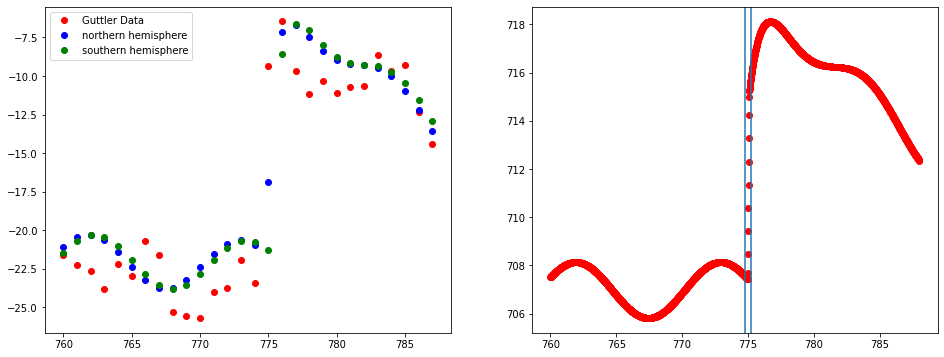

In [10]:
vals = [-21.63, -22.28, -22.64, -23.83, -22.20, -22.99, -20.73, -21.59, -25.32, -25.6, -25.70, -24.00, -23.73,
        -21.91, -23.44, -9.335, -6.46, -9.70, -11.17, -10.31, -11.10, -10.72, -10.67, -8.63, -9.68, -9.31,
        -12.33, -14.44]

import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16.0, 6.0))

ax1.plot(d_14_time_series_coarse, vals, 'ro')
ax1.plot(d_14_time_series_coarse, d_14_c - 22.64846153846154, 'bo')
ax1.plot(d_14_time_series_coarse, d_14_c2 - 22.64846153846154, 'go')

ax1.legend(["Guttler Data", "northern hemisphere", "southern hemisphere"])
ax2.plot(d_14_time_series_fine, event[:, 1], 'ro')
a = 774.75
plt.axvline(a)
plt.axvline(a + 0.5)
# plt.axvline(a + 1)
# # # ax2.set_ylim(0,5)
# # ax2.set_xlim(774, 776)

plt.ticklabel_format(useOffset=False)

plt.show()